In [1]:
#pandas
import pandas as pd 

#matplotlib
import matplotlib.pyplot as plt 

#seaborn
import seaborn as sns

#numpy
import numpy as np

#sklearn
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
crop_df = pd.read_csv('./Dataset/Crop_recommendation.csv')
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


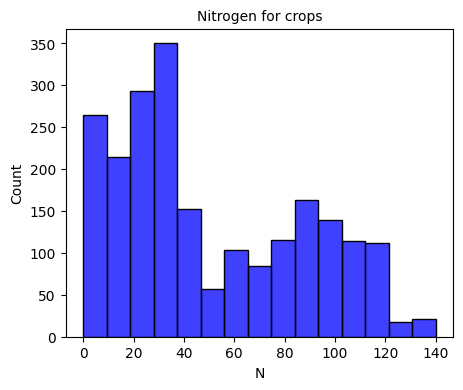

In [8]:
plt.figure(figsize=(5,4))
sns.histplot(x='N',data=crop_df,color='b');
plt.title("Nitrogen for crops",{'fontsize':10});

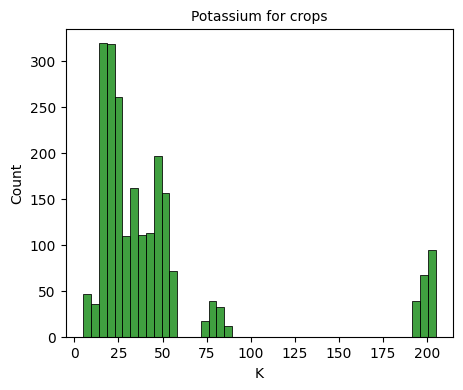

In [13]:
plt.figure(figsize=(5,4))
sns.histplot(x='K',data=crop_df,color='g');
plt.title("Potassium for crops",{'fontsize':10});

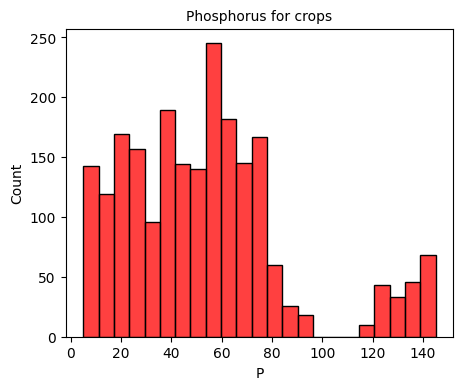

In [27]:
plt.figure(figsize=(5,4))
sns.histplot(x='P',data=crop_df,color='red');
plt.title("Phosphorus for crops",{'fontsize':10});

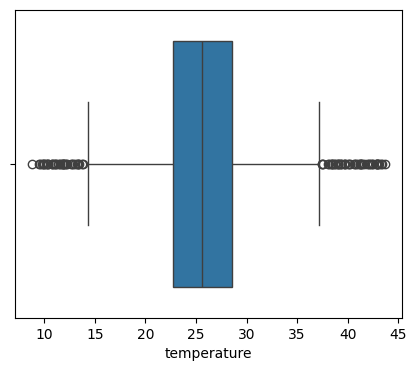

In [28]:
plt.figure(figsize=(5,4))
sns.boxplot(x=crop_df.temperature);

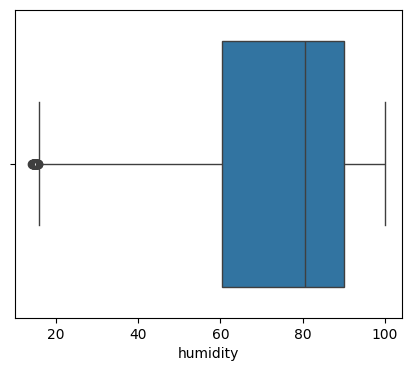

In [29]:
plt.figure(figsize=(5,4))
sns.boxplot(x=crop_df.humidity);

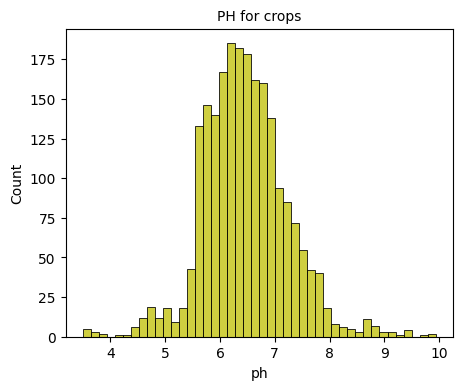

In [12]:
plt.figure(figsize=(5,4))
sns.histplot(x='ph',data=crop_df,color='y');
plt.title("PH for crops",{'fontsize':10});

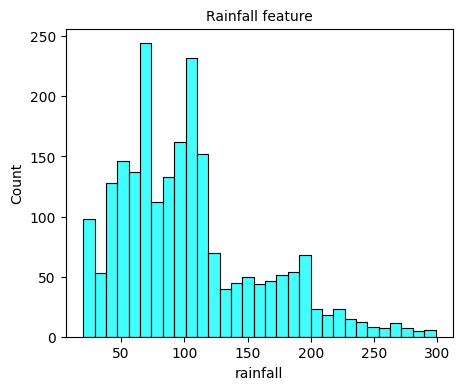

In [11]:
plt.figure(figsize=(5,4))
sns.histplot(x='rainfall',data=crop_df,color='cyan');
plt.title("Rainfall feature",{'fontsize':10});

In [16]:
X = crop_df.drop(['label'], axis=1)
y = crop_df['label']


In [15]:
print(crop_df.columns.tolist())


['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [18]:
X_train.head()

,N,P,K,temperature,humidity,ph,rainfall
68,69,46,41,23.641248,80.285979,5.012140,263.110330
139,76,57,18,18.980273,74.526008,6.092726,94.262494
124,100,48,16,25.718958,67.221907,5.549902,74.514908
703,42,73,25,34.036792,67.211138,6.501869,73.235736
2170,114,20,26,25.556567,62.670878,7.279057,193.586623


In [19]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [31]:
models = {
    LogisticRegression(max_iter=500): 'Logistic Regression',
    RandomForestClassifier(): 'Random Forest',
    SVC(): 'Support Vector Machine'
}

trained_models = {}

for model in models.keys():
    model.fit(X_train, y_train)
    trained_models[model] = models[model]  


for model, name in trained_models.items():
    print(f"Accuracy Score for {name} is : {model.score(X_test, y_test)*100:.4f}%")


Accuracy Score for Logistic Regression is : 98.1818%
Accuracy Score for Random Forest is : 99.3182%
Accuracy Score for Support Vector Machine is : 98.1818%


In [21]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
y_pred = rf.predict(X_test)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        16
   blackgram       1.00      1.00      1.00        19
    chickpea       1.00      1.00      1.00        11
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        28
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        15
        jute       0.96      0.96      0.96        26
 kidneybeans       1.00      1.00      1.00        21
      lentil       0.94      1.00      0.97        15
       maize       1.00      1.00      1.00        17
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00      1.00        19
      papaya       1.00    

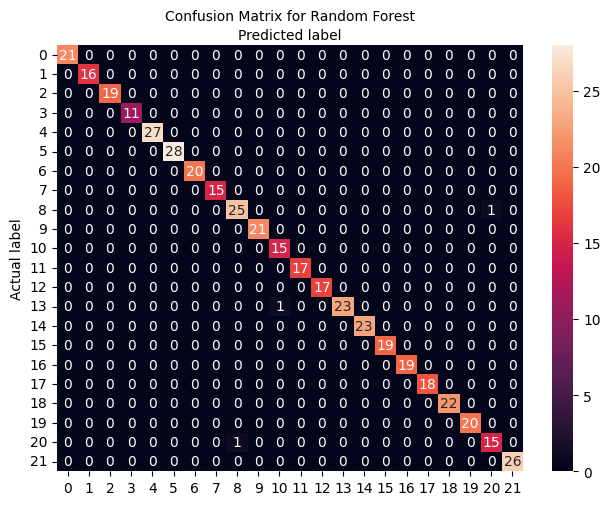

In [25]:
class_names = np.arange(0,21)
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,fmt = 'd')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title(f'Confusion Matrix for Random Forest', {'fontsize':10})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [34]:
import pickle

pickle.dump(rf, open("model.pkl", "wb"))